# **Comparison transcript length bias for multiple DE analysis pipelines**

In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from pandas import DataFrame

**Load data**

In [3]:
# results paths
de_paths = {"NOISeq": "noiseq_res.csv",
            "DESeq": "deseq_res.csv",
            "Limma": "limma_res.csv",
            "BaySeq": "bayseq_res.csv"}

In [8]:
# load DE results
de_res = {}
for method, path in de_paths.items():
    # Open the CSV file
    dat = []
    with open(path, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            dat.append(row)
    de_res[method] = dat

In [20]:
fold_change = {k: {} for k in de_paths.keys()}

In [71]:
# extract fold changes for each method one-by-one
fold_changes = {k: {"name": [], "fold_change": []} for k in de_paths.keys()}
for row in de_res["NOISeq"][1:]:
    fold_changes["NOISeq"]["name"].append(row[0])
    fold_changes["NOISeq"]["fold_change"].append(float(row[3]) if row[3] != "NA" else np.nan)
for row in de_res["DESeq"][1:]:
    fold_changes["DESeq"]["name"].append(row[0])
    fold_changes["DESeq"]["fold_change"].append(float(row[2]) if row[2] != "NA" else np.nan)
for row in de_res["Limma"][1:]:
    fold_changes["Limma"]["name"].append(row[0])
    fold_changes["Limma"]["fold_change"].append(float(row[1]) if row[1] != "NA" else np.nan)
for row in de_res["BaySeq"][1:]:
    fold_changes["BaySeq"]["name"].append(row[1])
    fold_changes["BaySeq"]["fold_change"].append(float(row[3]) if row[3] != "NA" else np.nan)

In [105]:
de_res["BaySeq"]

[['', 'name', 'NDE', 'DE'],
 ['1', 'FBgn0000008', '-4.07954573386539', '-0.0170598430145432'],
 ['2', 'FBgn0000014', '-5.01830133003978e-10', '-21.4127589629126'],
 ['3', 'FBgn0000015', '-6.27935392571999e-09', '-18.8859986799326'],
 ['4', 'FBgn0000017', '-1.05752885559696e-05', '-11.4569958342335'],
 ['5', 'FBgn0000018', '-0.023981033509429', '-3.7424585862906'],
 ['6', 'FBgn0000022', '-5.01830133003978e-10', '-21.4127589629126'],
 ['7', 'FBgn0000024', '-0.000378489779478741', '-7.87951072707271'],
 ['8', 'FBgn0000028', '-0.0933072131957005', '-2.41814873534465'],
 ['9', 'FBgn0000032', '-4.26547671823758', '-0.0141447367353322'],
 ['10', 'FBgn0000036', '-1.00211467000122e-05', '-11.5108180379835'],
 ['11', 'FBgn0000037', '-0.00533760568158925', '-5.23564571655056'],
 ['12', 'FBgn0000038', '0', '-292.407853073682'],
 ['13', 'FBgn0000039', '-0.00424262849183066', '-5.46469283874539'],
 ['14', 'FBgn0000042', '-1.12619602532504e-09', '-20.6044247310985'],
 ['15', 'FBgn0000043', '-0.023359

In [73]:
# sort into same order
fold_changes_sorted = {k: {"name": [], "fold_change": []} for k in de_paths.keys()}
for method, data in fold_changes.items():
    sort_idxs = np.argsort(data["name"])
    print(f"{len(fold_changes[method]['name'])=}, {len(fold_changes[method]['fold_change'])=}")
    fold_changes_sorted[method]["name"] = [fold_changes[method]["name"][idx] for idx in sort_idxs]
    fold_changes_sorted[method]["fold_change"] = [fold_changes[method]["fold_change"][idx] for idx in sort_idxs]

len(fold_changes[method]['name'])=14077, len(fold_changes[method]['fold_change'])=14077
len(fold_changes[method]['name'])=14077, len(fold_changes[method]['fold_change'])=14077
len(fold_changes[method]['name'])=14077, len(fold_changes[method]['fold_change'])=14077
len(fold_changes[method]['name'])=14077, len(fold_changes[method]['fold_change'])=14077


In [95]:
gene_names_path = "gene_names.csv"
gene_names = []
with open(gene_names_path, "r") as fid:
    reader = csv.reader(fid)
    for row_idx, row in enumerate(reader):
        if row_idx > 0:
            gene_names.append(row[0])
gene_length_path = "gene_lengths.csv"
gene_lengths = []
with open(gene_length_path, "r") as fid:
    reader = csv.reader(fid)
    for row_idx, row in enumerate(reader):
        if row_idx > 0:
            gene_lengths.append(float(row[0]))
sort_idxs = np.argsort(data["name"])
gene_names_sorted = [gene_names[idx] for idx in sort_idxs]
gene_lengths_sorted = [gene_lengths[idx] for idx in sort_idxs]

In [97]:
gene_names_sorted

['FBgn0000008',
 'FBgn0000014',
 'FBgn0000015',
 'FBgn0000017',
 'FBgn0000018',
 'FBgn0000022',
 'FBgn0000024',
 'FBgn0000028',
 'FBgn0000032',
 'FBgn0000036',
 'FBgn0000037',
 'FBgn0000038',
 'FBgn0000039',
 'FBgn0000042',
 'FBgn0000043',
 'FBgn0000044',
 'FBgn0000045',
 'FBgn0000046',
 'FBgn0000047',
 'FBgn0000052',
 'FBgn0000053',
 'FBgn0000055',
 'FBgn0000056',
 'FBgn0000057',
 'FBgn0000061',
 'FBgn0000063',
 'FBgn0000064',
 'FBgn0000071',
 'FBgn0000075',
 'FBgn0000077',
 'FBgn0000078',
 'FBgn0000079',
 'FBgn0000083',
 'FBgn0000084',
 'FBgn0000092',
 'FBgn0000094',
 'FBgn0000097',
 'FBgn0000100',
 'FBgn0000108',
 'FBgn0000109',
 'FBgn0000114',
 'FBgn0000115',
 'FBgn0000116',
 'FBgn0000117',
 'FBgn0000119',
 'FBgn0000120',
 'FBgn0000121',
 'FBgn0000137',
 'FBgn0000139',
 'FBgn0000140',
 'FBgn0000146',
 'FBgn0000147',
 'FBgn0000150',
 'FBgn0000152',
 'FBgn0000153',
 'FBgn0000157',
 'FBgn0000158',
 'FBgn0000163',
 'FBgn0000166',
 'FBgn0000173',
 'FBgn0000179',
 'FBgn0000180',
 'FBgn00

In [114]:
# create dataframe of fold changes and sort by transcript length
df  = DataFrame({
    "name": gene_names_sorted,
    "length": gene_lengths_sorted,
    "NOISeq": fold_changes_sorted["NOISeq"]["fold_change"],
    "DESeq": fold_changes_sorted["DESeq"]["fold_change"],
    "Limma": fold_changes_sorted["Limma"]["fold_change"],
    "BaySeq": fold_changes_sorted["BaySeq"]["fold_change"]
}
)
df = df.sort_values(by='length', ascending=True)

In [115]:
df

,name,length,NOISeq,DESeq,Limma,BaySeq
12965,FBgn0262885,7.189000,NaN,NaN,0.034402,-21.412759
13736,FBgn0267517,12.989750,NaN,NaN,0.034402,-21.412759
13742,FBgn0267523,12.989750,NaN,NaN,0.034402,-21.412759
13734,FBgn0267514,12.989750,0.115703,-0.100625,-0.094187,-4.164761
13731,FBgn0267509,12.989750,NaN,NaN,0.034402,-21.412759
...,...,...,...,...,...,...
944,FBgn0005666,26318.466960,0.334126,-0.321885,-0.321085,-0.761490
11984,FBgn0086906,31928.540989,0.318559,-0.308212,-0.325768,-2.407384
12658,FBgn0261836,36391.917693,0.403790,-0.389683,-0.346899,-17.948699
11174,FBgn0053196,47999.048662,1.110242,-1.094644,-1.048076,-0.001775


**Dummy data**

In [ ]:
methods = ["NOISeq", "DESeq", "Limma", "BaySeq"]
lengths = np.arange(5, 1000)
fold_changes = {}
for method_idx, method_name in enumerate(methods):
    fold_changes[method_name] = np.log(lengths) + 1 + 0.5 * np.random.random(len(lengths))

**Visualise fold changes for different pipelines**

(0.0, 48548.06275)

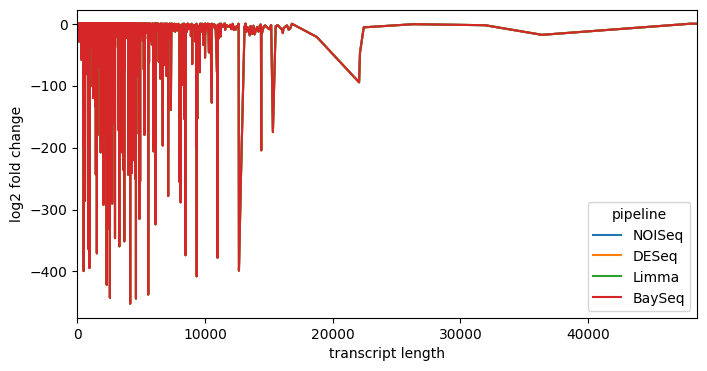

In [ ]:
methods = ["NOISeq", "DESeq", "Limma", "BaySeq"]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for method_idx, method_name in enumerate(methods):
    ax.plot(df["length"], df[method], label=method_name)
ax.set_xlabel("transcript length")
ax.set_ylabel("log2 fold change")
ax.legend(title="DE method pipeline")
ax.set_xlim(0, np.max(df["length"]))

**Evaluate transcript length dependence for different pipelines**

In [10]:
poly_order = 3
fits = {}
models = {}
for method_idx, method_name in enumerate(methods):
    

    # Create polynomial features (e.g., degree 2 for quadratic)
    poly = PolynomialFeatures(degree=poly_order)
    X_poly = poly.fit_transform(np.expand_dims(lengths, axis=1))

    # Fit the linear model on polynomial features
    model = LinearRegression()
    model.fit(X_poly, fold_changes[method_name])

    # store predictions and fitted models
    fits[method_name] = model.predict(X_poly)
    models[method_name] = model

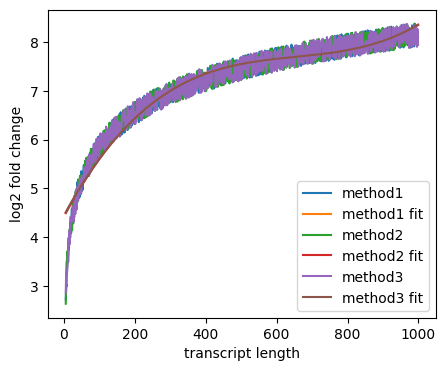

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for method_idx, method_name in enumerate(methods):
    ax.plot(lengths, fold_changes[method_name], label=method_name)
    ax.plot(lengths, fits[method_name], label=f"{method_name} fit")
ax.set_xlabel("transcript length")
ax.set_ylabel("log2 fold change")
ax.legend()

In [17]:
models["method1"].coef_

array([ 0.00000000e+00,  1.37363841e-02, -2.01131085e-05,  1.02937903e-08])